In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
import collections
import os
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
file_name = sorted(os.listdir('graph_info'))
print(len(file_name))

133


In [3]:
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
name_need = raw_data[raw_data['month']=='2020-12'][['简称','subsector']].drop_duplicates()
name_need.set_index(["简称"], inplace=True)

In [1]:

def remove_fixed_num(n):
    ### 四个子模块相互比较
    if n<3:
        ### 保险业
        all_result1 = []
        pmfg_nodes1 = []
        plt.figure(figsize=(20,8))
        plt.suptitle(f'remove_nodes,n={n}')
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes1.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()

            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='保险业'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result1.append(ccp_list[-1])
        plt.subplot(1,4,1)
        y1 = np.array(all_result1)/pmfg_nodes1
        plt.scatter(file_name,y1,label=f' 保险业',color='b',alpha=0.7,s=[100/x for x in y1])
        plt.legend()
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        ###  货币金融
        all_result2 = []
        pmfg_nodes2 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes2.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()

            ccp_list = []
            for j in range(n):
                # print(degree_df[degree_df['subsector']=='保险业'])
                pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result2.append(ccp_list[-1])
        plt.subplot(1,4,2)
        y2 = np.array(all_result2)/pmfg_nodes2
        plt.scatter(file_name,y2,label=f' 货币金融',color='y',alpha=0.7,s=[100/x for x in y2])
        plt.legend()        
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        ### 其他金融业
        all_result3 = []
        pmfg_nodes3 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes3.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='其他金融业'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result3.append(ccp_list[-1])
        plt.subplot(1,4,3)
        y3 = np.array(all_result3)/pmfg_nodes3
        plt.scatter(file_name,y3,label=f' 其他金融业',color='g',alpha=0.7,s=[100/x for x in y3])
        plt.legend()
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        ### 资本市场服务
        all_result4 = []
        pmfg_nodes4 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes4.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result4.append(ccp_list[-1])
        plt.subplot(1,4,4)    
        y4 = np.array(all_result4)/pmfg_nodes4
        plt.scatter(file_name,y4,label=f' 资本市场服务',color='r',alpha=0.7,s=[100/x for x in y4])
        plt.legend()
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        plt.show()



### 三个子行业比较
    elif n<10:
        ### 货币金融
        plt.figure(figsize=(20,8))
        plt.suptitle(f'remove_nodes,n={n}')
        all_result2 = []
        pmfg_nodes2 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes2.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result2.append(ccp_list[-1])
        plt.subplot(1,3,1)
        y2 = np.array(all_result2)/pmfg_nodes2
        plt.scatter(file_name,y2,label=f' 货币金融',color='y',alpha=0.7,s=[100/x for x in y2])
        plt.legend()       
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        ### 其他金融业
        all_result3 = []
        pmfg_nodes3 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes3.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='其他金融业'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result3.append(ccp_list[-1])
        plt.subplot(1,3,2)
        y3 = np.array(all_result3)/pmfg_nodes3
        plt.scatter(file_name,y3,label=f' 其他金融业',color='g',alpha=0.7,s=[100/x for x in y3])
        plt.legend()
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        ### 资本市场服务
        all_result4 = []
        pmfg_nodes4 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes4.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result4.append(ccp_list[-1])
        plt.subplot(1,3,3)    
        y4 = np.array(all_result4)/pmfg_nodes4
        plt.scatter(file_name,y4,label=f' 资本市场服务',color='r',alpha=0.7,s=[100/x for x in y4])
        plt.legend()
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        plt.show()



### 两个子行业对比
    elif n<15:
        ### 货币金融
        plt.figure(figsize=(20,8))
        plt.suptitle(f'remove_nodes,n={n}')
        all_result2 = []
        pmfg_nodes2 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes2.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result2.append(ccp_list[-1])
        plt.subplot(1,2,1)
        y2 = np.array(all_result2)/pmfg_nodes2
        plt.scatter(file_name,y2,label=f' 货币金融',color='y',alpha=0.7,s=[100/x for x in y2])
        plt.legend()     
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
        ### 资本市场服务
        all_result4 = []
        pmfg_nodes4 = []
        for i in range(len(file_name)):
            pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
            pmfg_nodes4.append(pmfg.number_of_nodes())
            degree_dict = dict(pmfg.degree())
            list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
            degree_dict = [k for k,v in list1]
            degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
            degree_df.index=degree_df[f'{file_name[i][:-8]}']
            degree_df = pd.concat([degree_df,name_need],axis=1).dropna()

            ccp_list = []
            for j in range(n):
                pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
                size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
                ccp_list.append(size_of_ccp)
            all_result4.append(ccp_list[-1])
        plt.subplot(1,2,2)    
        y4 = np.array(all_result4)/pmfg_nodes4
        plt.scatter(file_name,y4,label=f' 资本市场服务',color='r',alpha=0.7,s=[100/x for x in y4])
        plt.legend()
        plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )

        plt.show()

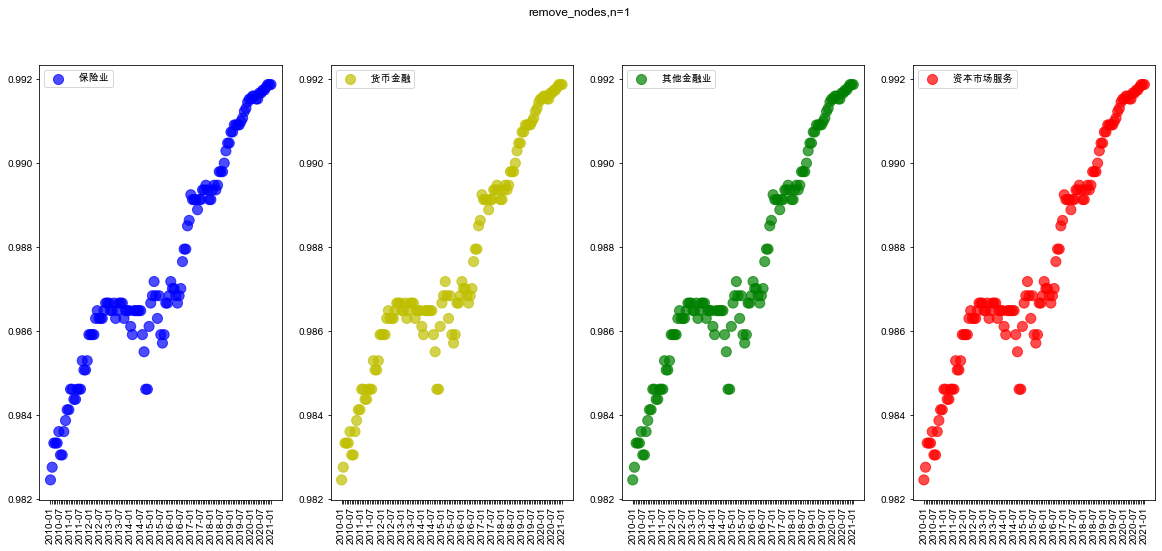

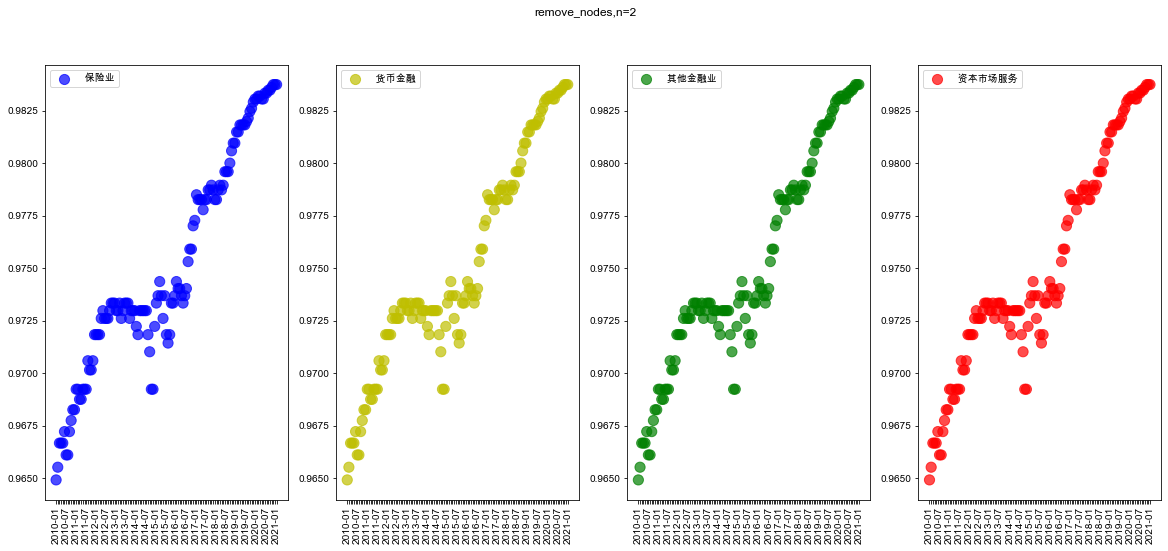

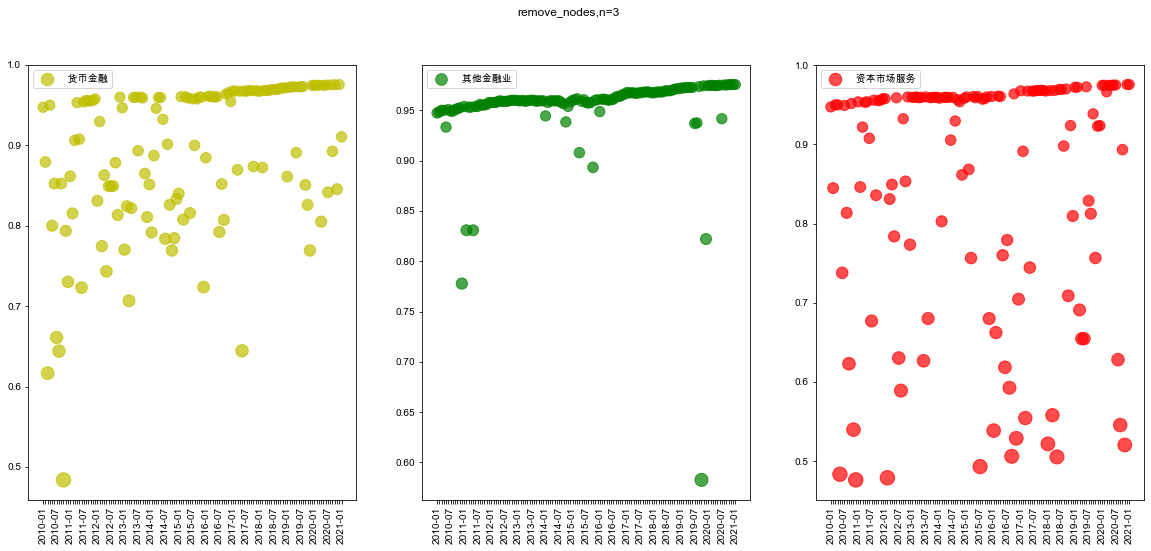

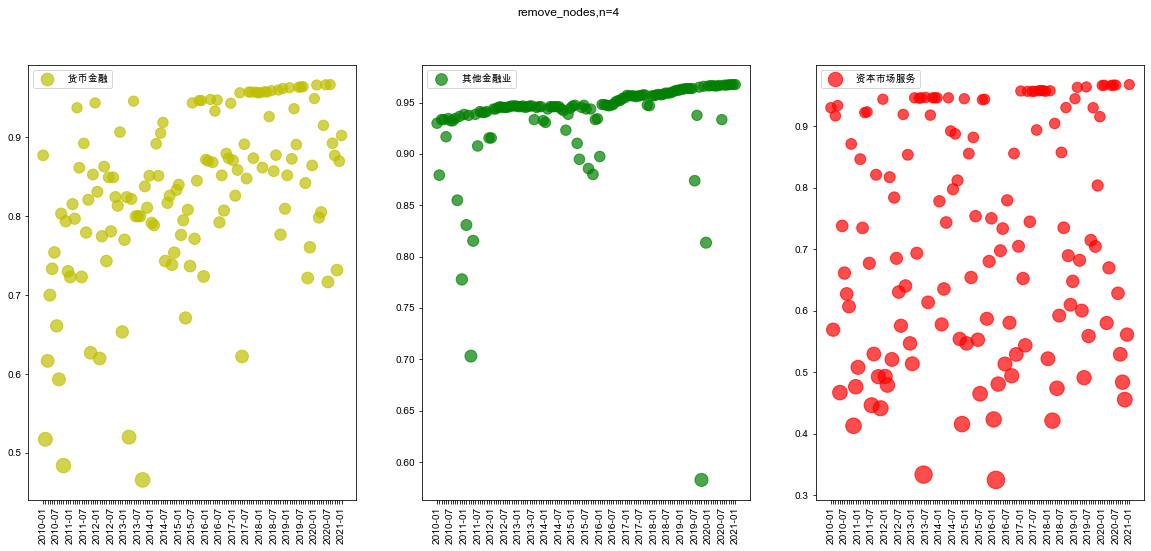

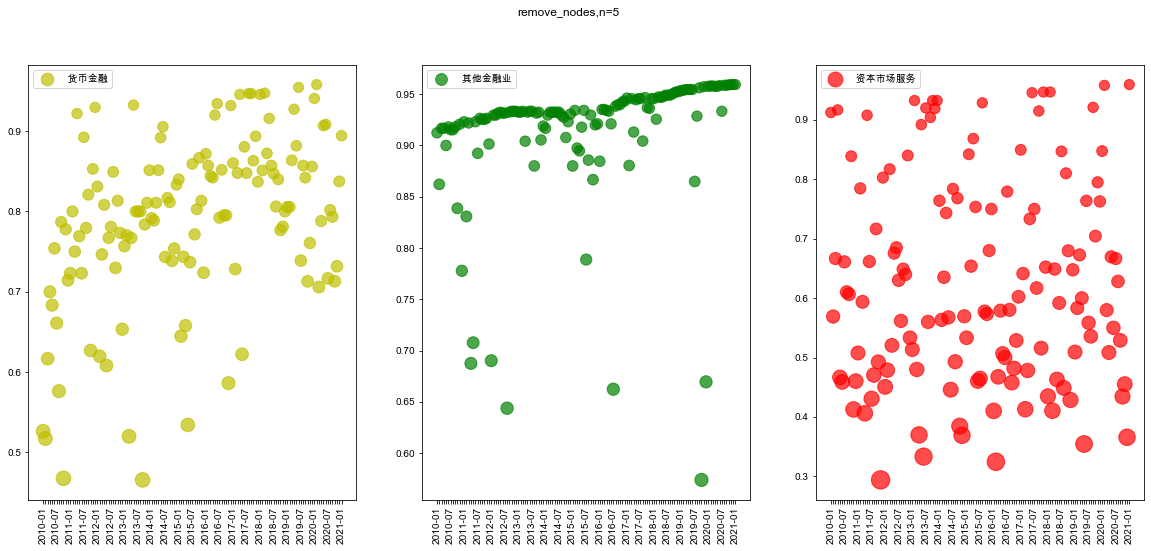

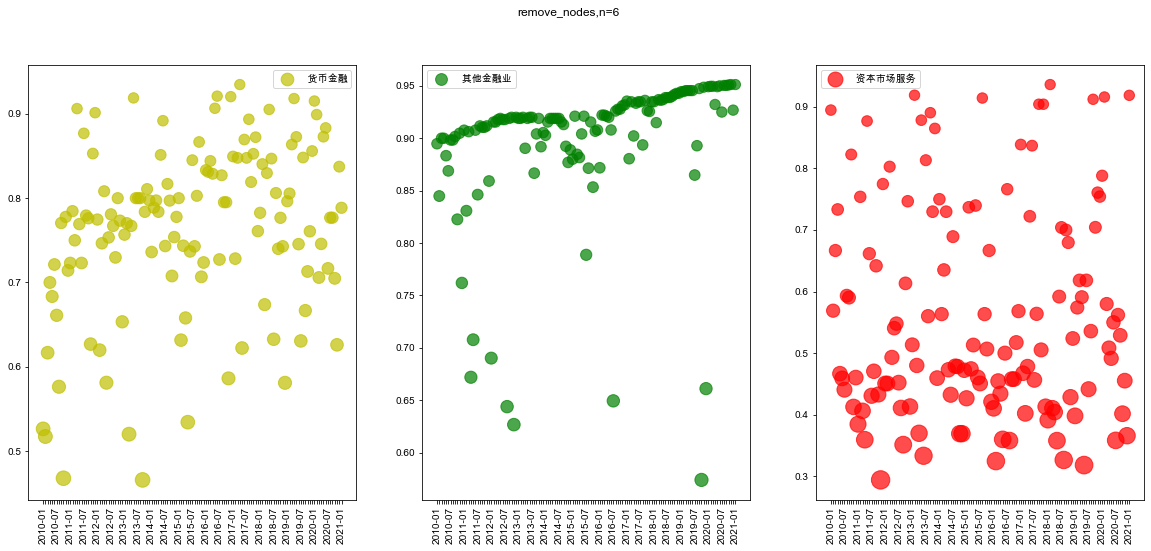

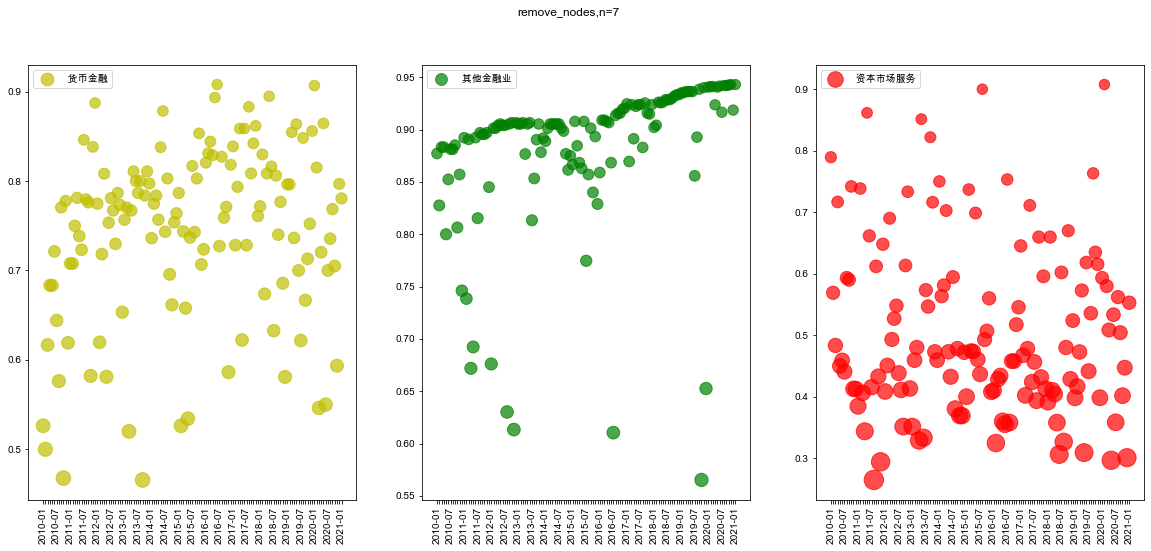

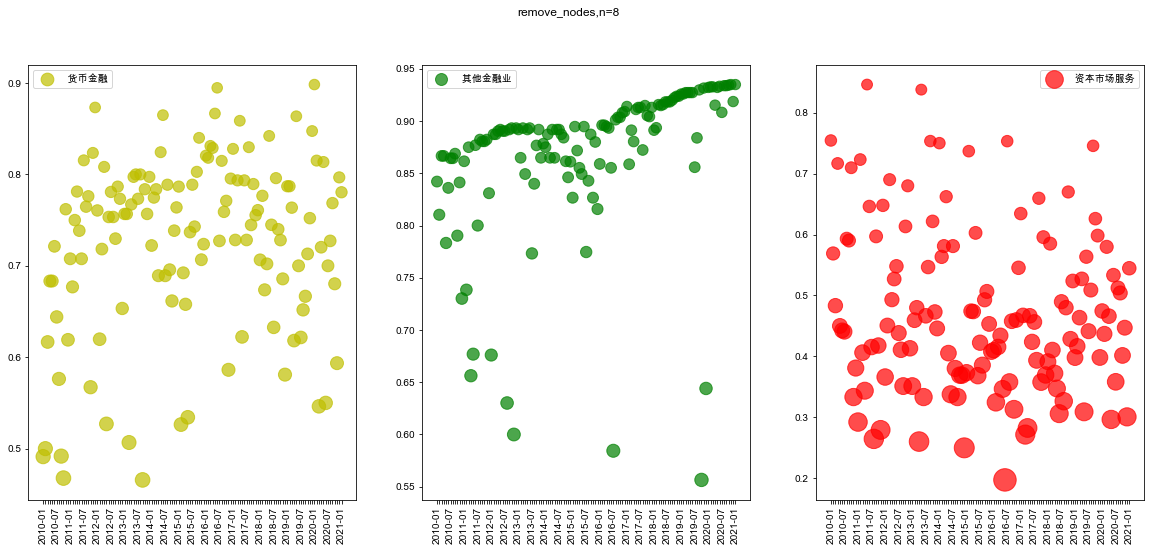

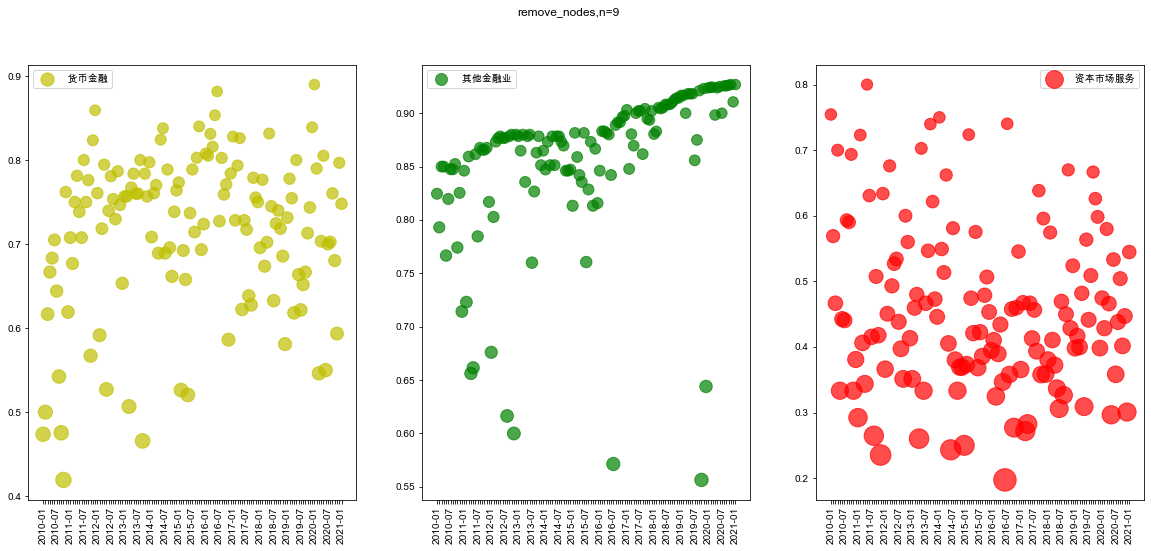

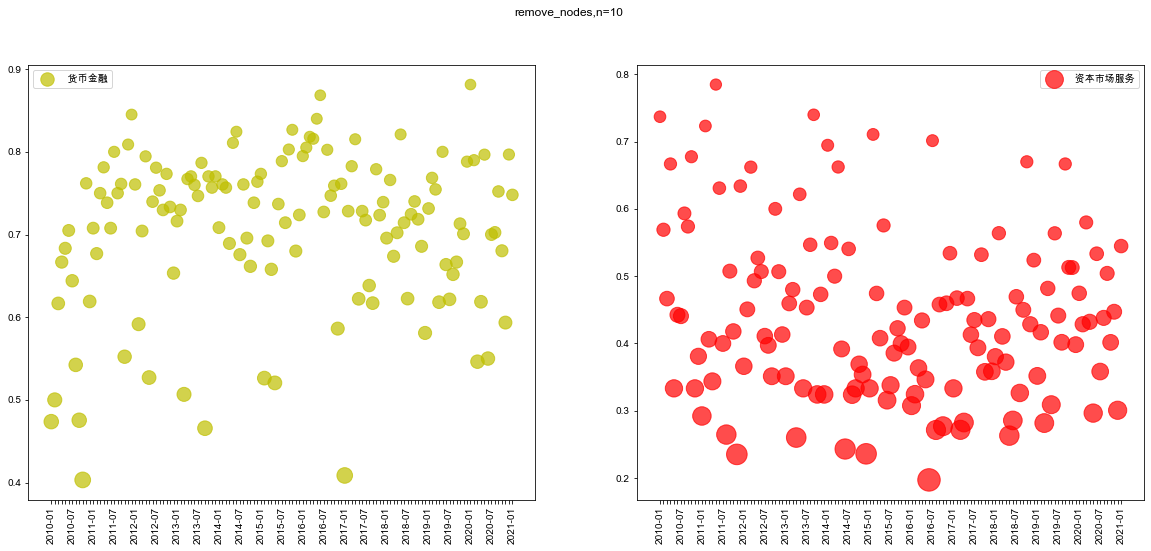

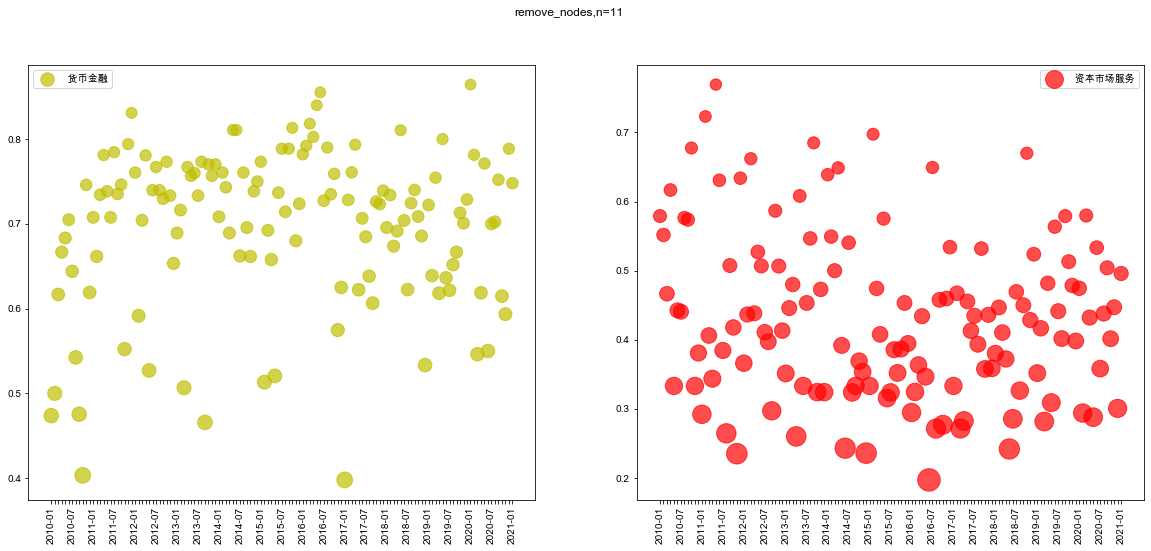

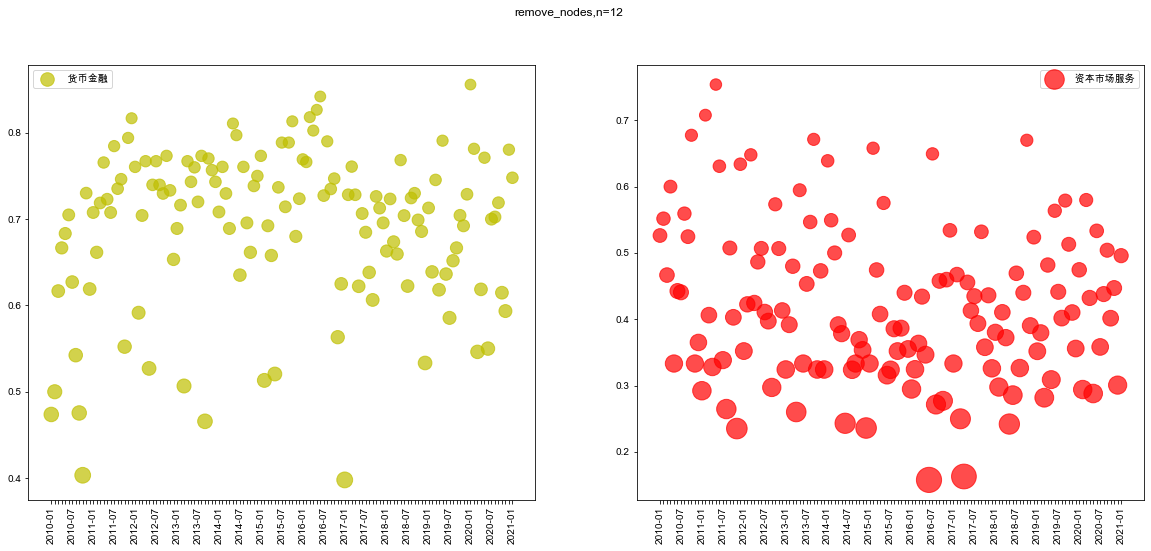

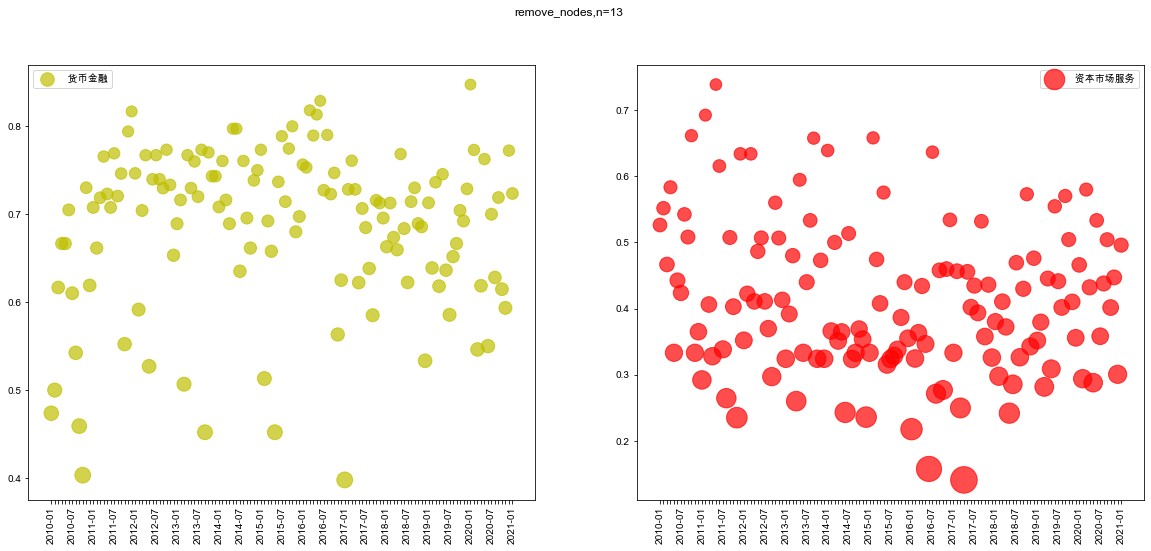

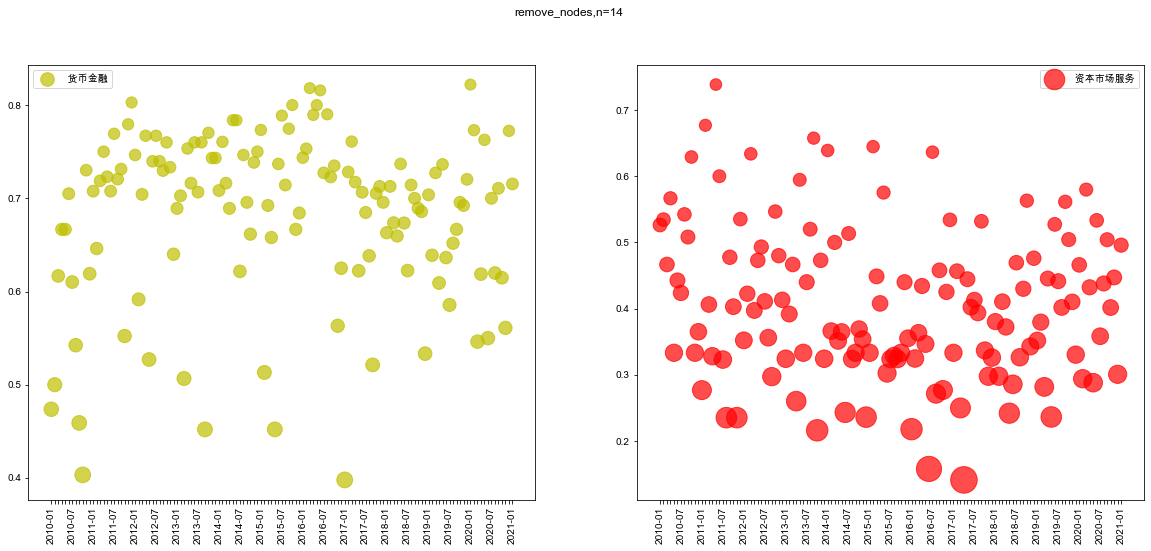

In [136]:
for i in range(1,15):
    remove_fixed_num(n=i)

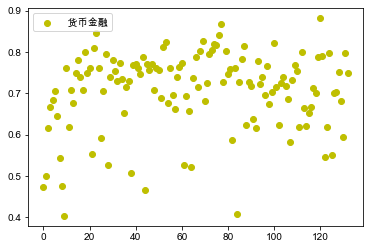

In [80]:

n = 10
all_result = []
pmfg_nodes = []

for i in range(len(file_name)):
# for i in range(10):
    pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
    pmfg_nodes.append(pmfg.number_of_nodes())
    degree_dict = dict(pmfg.degree())
    list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
    # list1= sorted(degree_dict.keys(),reverse=True)
    degree_dict = [k for k,v in list1]
    # print(degree_dict)
    degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
    degree_df.index=degree_df[f'{file_name[i][:-8]}']
    degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
    # print(degree_df)

    ccp_list = []
    # plt.suptitle(f'{file_name[i][:-8]}')
    # plt.subplot(2,2,1)
    for j in range(n):
        # print(degree_df[degree_df['subsector']=='保险业'])
        pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
        size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
        ccp_list.append(size_of_ccp)
    all_result.append(ccp_list[-1])
plt.scatter(range(len(all_result)),np.array(all_result)/pmfg_nodes,label=f' 货币金融',color='y')
# print(len(degree_df[degree_df['subsector']=='保险业']))
# print(degree_df[degree_df['subsector']=='保险业'])
# plt.hlines(0.5,xmin=0,xmax=len(degree_df[degree_df['subsector']=='保险业'])-1)
plt.legend()
plt.show()

    # all_result.append(ccp_list)


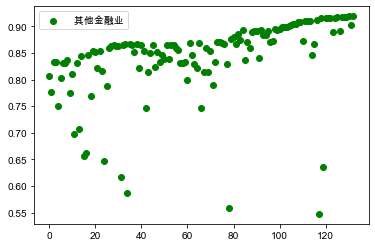

In [81]:


all_result = []
pmfg_nodes = []

for i in range(len(file_name)):
# for i in range(10):
    pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
    pmfg_nodes.append(pmfg.number_of_nodes())
    degree_dict = dict(pmfg.degree())
    list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
    # list1= sorted(degree_dict.keys(),reverse=True)
    degree_dict = [k for k,v in list1]
    # print(degree_dict)
    degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
    degree_df.index=degree_df[f'{file_name[i][:-8]}']
    degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
    # print(degree_df)

    ccp_list = []
    # plt.suptitle(f'{file_name[i][:-8]}')
    # plt.subplot(2,2,1)
    for j in range(n):
        # print(degree_df[degree_df['subsector']=='保险业'])
        pmfg.remove_node(degree_df[degree_df['subsector']=='其他金融业'].iloc[j].values[0])
        size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
        ccp_list.append(size_of_ccp)
    all_result.append(ccp_list[-1])
plt.scatter(range(len(all_result)),np.array(all_result)/pmfg_nodes,label=f' 其他金融业',color='g')
# print(len(degree_df[degree_df['subsector']=='保险业']))
# print(degree_df[degree_df['subsector']=='保险业'])
# plt.hlines(0.5,xmin=0,xmax=len(degree_df[degree_df['subsector']=='保险业'])-1)
plt.legend()
plt.show()

    # all_result.append(ccp_list)


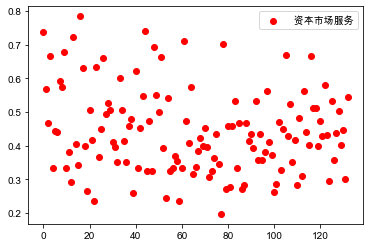

In [82]:


all_result = []
pmfg_nodes = []

for i in range(len(file_name)):
# for i in range(10):
    pmfg = nx.read_gpickle(f'graph_info/{file_name[i]}')
    pmfg_nodes.append(pmfg.number_of_nodes())
    degree_dict = dict(pmfg.degree())
    list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
    # list1= sorted(degree_dict.keys(),reverse=True)
    degree_dict = [k for k,v in list1]
    # print(degree_dict)
    degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
    degree_df.index=degree_df[f'{file_name[i][:-8]}']
    degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
    # print(degree_df)

    ccp_list = []
    # plt.suptitle(f'{file_name[i][:-8]}')
    # plt.subplot(2,2,1)
    for j in range(n):
        # print(degree_df[degree_df['subsector']=='保险业'])
        pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
        size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
        ccp_list.append(size_of_ccp)
    all_result.append(ccp_list[-1])
plt.scatter(range(len(all_result)),np.array(all_result)/pmfg_nodes,label=f' 资本市场服务',color='r')
# print(len(degree_df[degree_df['subsector']=='保险业']))
# print(degree_df[degree_df['subsector']=='保险业'])
# plt.hlines(0.5,xmin=0,xmax=len(degree_df[degree_df['subsector']=='保险业'])-1)
plt.legend()
plt.show()
